## Domača naloga 4
Marko Tacer, 23222087

Pri vaji smo s pomočjo generatorja zajeli signaliin z njimi želeli prikazati odvajanje / integriranje.
Najlažje to pokažemo na sinusnem signalu, saj je s svojim odvodom v skaliranem sorazmerju enak cosinusnemu signali. Izmerili smo dva signala, ki smo jih potem smiselno izrezali,da smo dobili fazno zamaknjena $\rightarrow$ cosinus in sinus.
$$$$

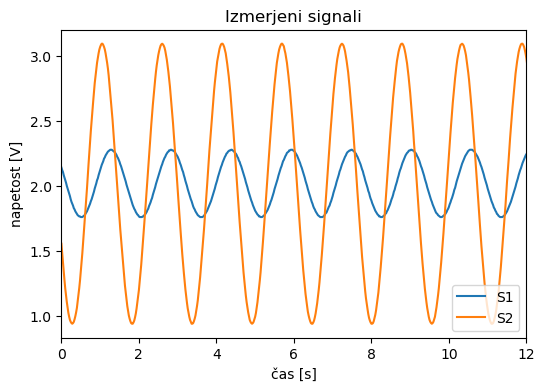

750

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
from scipy import signal
from scipy.signal import find_peaks

# Uvozimo array časovnih korakov in array napetosti signala 1
file = 'S1.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
loaded_data.keys()

t = data[1]
S1 = data[2]


file = 'S2.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T

# Uvozimo še signal 2 in vse skupaj prikažemo
S2 = data[2]

fig = plt.figure(figsize=(6,4))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

plt.subplot(1,1,1)
plt.gca().set_title('Izmerjeni signali')
plt.plot(t, S1, label='S1')
plt.plot(t, S2, label='S2')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.legend(loc='lower right')
plt.xlim(0, 12)
plt.show()
len(S1)

In [2]:
peak_S1 = signal.find_peaks(S1)[0][:16]
peak_S2 = signal.find_peaks(S2)[0][:16]

S1_c = S1[peak_S1[0]-19:peak_S1[-1]-19]
#signal 1 definiramo kot sinus in bo najlažje, da ga poravnamo na začetek
S2_c = S2[peak_S2[0]:peak_S2[-1]]
#signal 2 postavimo v fazo, da se začne,
#kot da je 0stopinj faze in sinusni signal torej vrednost pri 0 = 1
t_c = t[:len(S2_c)]                                 #časovni vektor skrajšamo, da ustreza
frekvenca = 0.65                                    #naša definirana frekvenca
OFF = np.average([np.average(S1_c), np.average(S2_c)])
#definiran offset je 2 ampak je dejanski malce mimo

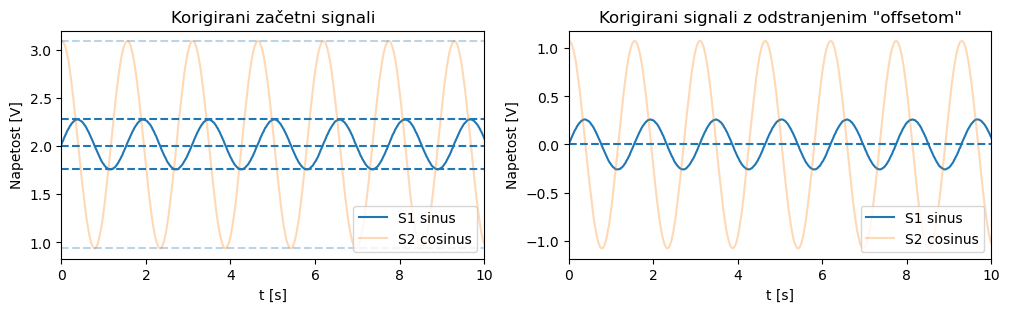

In [3]:
S2 = S2_c - OFF
S1 = S1_c - OFF

m1 = min(S1_c)
m2 = min(S2_c)
M1 = max(S1_c)
M2 = max(S2_c)

fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

t1_lim = 10
plt.subplot(2,2,1)
plt.gca().set_title('Korigirani začetni signali')
plt.plot(t_c, S1_c, color="C0", label='S1 sinus')
plt.plot(t_c, S2_c, color="C1", label='S2 cosinus', alpha=0.3)
plt.xlim(0, t1_lim)
plt.hlines(M1, 0, t1_lim, linestyles="dashed")
plt.hlines(m1, 0, t1_lim, linestyles="dashed")
plt.hlines(M2, 0, t1_lim, linestyles="dashed", alpha=0.3)
plt.hlines(m2, 0, t1_lim, linestyles="dashed", alpha=0.3)
plt.hlines(2, 0, t1_lim, linestyles="dashed")
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.gca().set_title('Korigirani signali z odstranjenim "offsetom"')
plt.plot(t_c, S1, color="C0", label='S1 sinus')
plt.plot(t_c, S2, color="C1", label='S2 cosinus', alpha=0.3)
plt.hlines(0, 0, t1_lim, linestyles="dashed")
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.xlim(0, t1_lim)
plt.legend(loc="lower right")
plt.show()

## Fourierjeva transformacija signalov
### Odvajanje

Naš sinusni signal bomo odvajali s pomočjo Fourierjeve transformacije. Pričakovan signal je cosinusni, po naslednji enačbi:
$$\frac{d}{dt}(A \cdot sin(\omega t)) = \omega \cdot A \cdot cos(\omega t)$$
V frekevnčni domeni:
$$\mathcal{F}(\dot{x}(t)) = \mathrm{i} \, \omega \, \mathcal{F}(x(t))= \mathrm{i} \, 2 \pi \, f \, \mathcal{F}(x(t))$$
Če signal odvajamo v frekvenčni domeni pričakujemo, da bomo dobili ckosinusni signal s sorazmerno amplitudo.

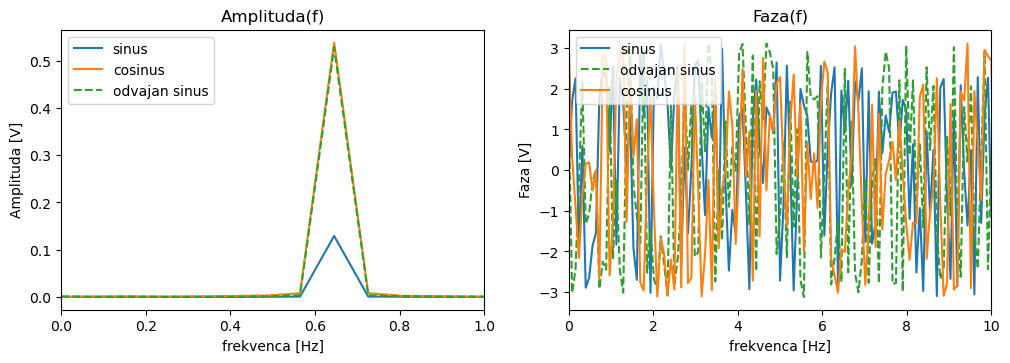

In [4]:
dt = t_c[2] - t_c[1]
freq_re = np.fft.rfftfreq(len(t_c), dt)
X_1_r = np.fft.rfft(S1, norm="forward");        # signal, ki ga bomo odvajali
X_2_r = np.fft.rfft(S2, norm="forward");        
# pomerjen signal, ki smo ga na roke izračunali, da izgleda naš odvod, kot bi moral naš odvod
X_1_odv = 1j*2*np.pi*frekvenca * X_1_r          # samo odvajanje s Fourierjevo transformacijo

fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.gca().set_title('Amplituda(f)')
plt.plot(freq_re, np.abs(X_1_r), color="C0", label='sinus')
plt.plot(freq_re, np.abs(X_2_r), color="C1", label='cosinus')
plt.plot(freq_re, np.abs(X_1_odv), '--', color="C2", label='odvajan sinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.xlim(0, 1)
plt.legend(loc='upper left')


plt.subplot(2,2,2)
plt.gca().set_title('Faza(f)')
plt.plot(freq_re, np.angle(X_1_r), color="C0", label='sinus')
plt.plot(freq_re, np.angle(X_1_odv), '--', color="C2", label='odvajan sinus')
plt.plot(freq_re, np.angle(X_2_r), color="C1", label='cosinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Faza [V]')
plt.xlim(0, 10)
plt.legend(loc='upper left')
plt.show()

Predstavimo vsekskupaj v časovni domeni in vidimo, da je odvajan signal s Fourierjem enak, kot smo predpostavili da bo (ko smo na roke odvajali).

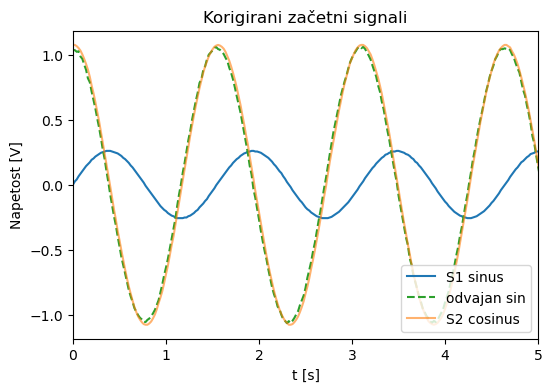

In [5]:
fig = plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
plt.gca().set_title('Korigirani začetni signali')
plt.plot(t_c, np.fft.irfft(X_1_r, norm="forward"), color="C0", label='S1 sinus')
plt.plot(t_c, np.fft.irfft(X_1_odv, norm="forward"), '--', color="C2", label='odvajan sin')
plt.plot(t_c, np.fft.irfft(X_2_r, norm="forward"), color="C1", label='S2 cosinus', alpha=0.6)
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.xlim(0, 5)
plt.legend(loc="lower right")
plt.show()

### Integriranje
Za integriranje vemo, da je:
$$
\int A \cdot cos(a \omega t)\,\textrm{d}t = \frac{1}{a} \cdot A \cdot sin(a \omega t)\
$$
S Fourierjevo transformacijo to rešimo na sledeč način
$$
\mathcal{F}\big\{\int_{-\infty}^t x(\tau)\,\textrm{d}\tau\big\} = \frac{X(f)}{\textrm{i}\,2\pi\,f}.
$$
Ponovno vzamemo obdelan signal od prej, tokrat cosinus

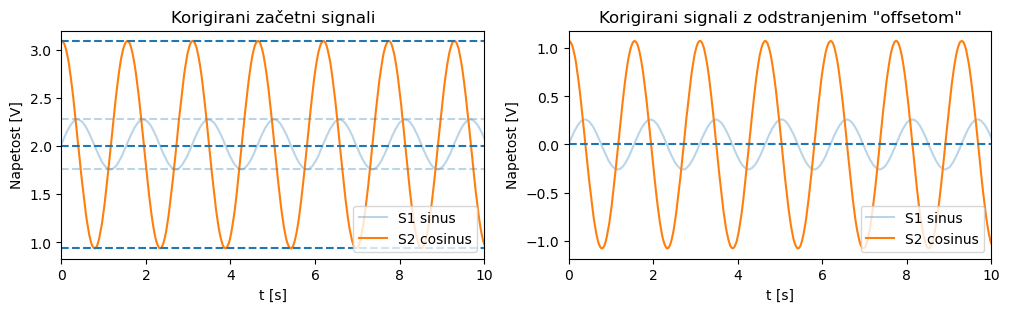

In [6]:
g2 = S2_c - OFF #cosinus
g1 = S1_c - OFF #sinus predviden izračunan integral - pomerjen

fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

t1_lim = 10
plt.subplot(2,2,1)
plt.gca().set_title('Korigirani začetni signali')
plt.plot(t_c, S1_c, color="C0", label='S1 sinus', alpha=0.3)
plt.plot(t_c, S2_c, color="C1", label='S2 cosinus')
plt.xlim(0, t1_lim)
plt.hlines(M1, 0, t1_lim, linestyles="dashed", alpha=0.3)
plt.hlines(m1, 0, t1_lim, linestyles="dashed", alpha=0.3)
plt.hlines(M2, 0, t1_lim, linestyles="dashed")
plt.hlines(m2, 0, t1_lim, linestyles="dashed")
plt.hlines(2, 0, t1_lim, linestyles="dashed")
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.legend(loc="lower right")

plt.subplot(2,2,2)
plt.gca().set_title('Korigirani signali z odstranjenim "offsetom"') 
# Z napisom korigiran mislim, da fazo=0, da lažje vidim, da gre za cosinus. 
plt.plot(t_c, g1, color="C0", label='S1 sinus', alpha=0.3)
plt.plot(t_c, g2, color="C1", label='S2 cosinus')
plt.hlines(0, 0, t1_lim, linestyles="dashed")
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.xlim(0, t1_lim)
plt.legend(loc="lower right")
plt.show()

Postopek praktično enak kot zgoraj, le da tokrat v pfrekvenčni domeni delimo namesto množimo

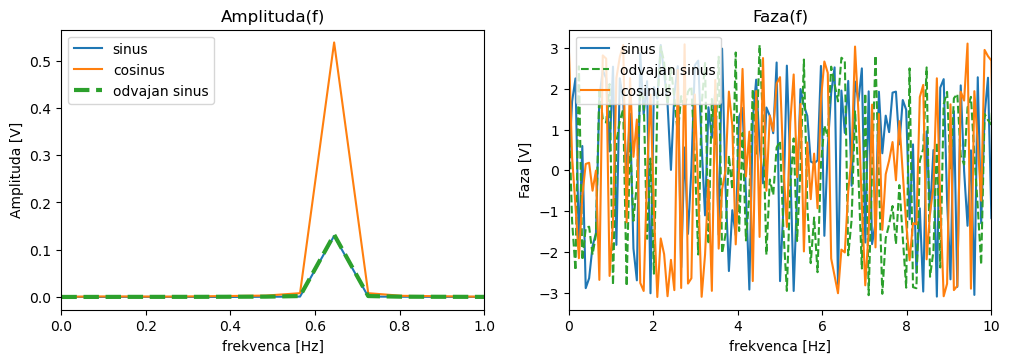

In [7]:
dt = t_c[2] - t_c[1]                            # enako
freq_re = np.fft.rfftfreq(len(t_c), dt)         # enako
X_1_r = np.fft.rfft(g1, norm="forward");        # pomerjen signal, (predviden integriran signal),
X_2_r = np.fft.rfft(g2, norm="forward");        # signal, ki ga integriramo
                                                # kot bi moral naš odvod
X_2_int = X_2_r /(1j*2*np.pi*frekvenca)         # samo integriranje s Fourierjevo transformacijo

fig = plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.gca().set_title('Amplituda(f)')
plt.plot(freq_re, np.abs(X_1_r), color="C0", label='sinus')
plt.plot(freq_re, np.abs(X_2_r), color="C1", label='cosinus')
plt.plot(freq_re, np.abs(X_2_int), '--', lw=3, color="C2", label='odvajan sinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.xlim(0, 1)
plt.legend(loc='upper left')


plt.subplot(2,2,2)
plt.gca().set_title('Faza(f)')
plt.plot(freq_re, np.angle(X_1_r), color="C0", label='sinus')
plt.plot(freq_re, np.angle(X_2_int), '--', color="C2", label='odvajan sinus')
plt.plot(freq_re, np.angle(X_2_r), color="C1", label='cosinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Faza [V]')
plt.xlim(0, 10)
plt.legend(loc='upper left')
plt.show()

Vidimo, da se integriran signal v frekvenčni domeni na amplitudnem spektru dobro ujema z našim predvidenim izmerjenim signalom

Še prehod v časovno domeno, da vidimo, če smo dobili podobno, kot smo predvideli (in izmerili).

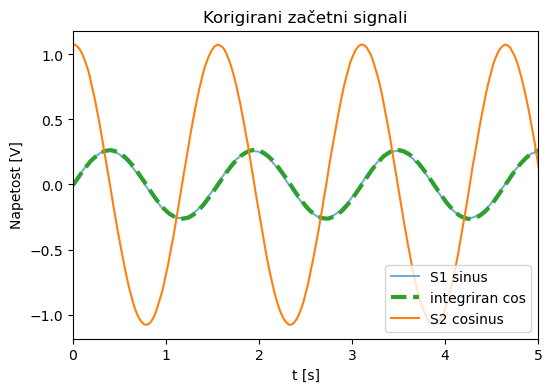

In [8]:
fig = plt.figure(figsize=(6,4))
plt.subplot(1,1,1)
plt.gca().set_title('Korigirani začetni signali')
plt.plot(t_c, np.fft.irfft(X_1_r, norm="forward"), color="C0", label='S1 sinus', alpha=0.6)
plt.plot(t_c, np.fft.irfft(X_2_int, norm="forward"), '--', lw=3, color="C2", label='integriran cos')
plt.plot(t_c, np.fft.irfft(X_2_r, norm="forward"), color="C1", label='S2 cosinus')
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.xlim(0, 5)
plt.legend(loc="lower right")
plt.show()

Dejansko se naša odvajan in integriran signal ne pokrijeta popolno. Vidimo lahko, da je signal načeloma pravi, malo je odstopanja v fazi (ker nismo uspeli popolnoma poravnati faze izmerjenih signalov na 0) in malo v frekvenci. Zavedati se moramo, da ko na vzbujevalniku nastavimo $$offset = 2V DC,$$ $$amplituda = 0.52,...$$
ne dobimo točno tega. V idealnem primeru bi imeli tudi mnogo višjo frekvenco vzorčenja. 

## Konvolucija + uporaba oken
### Oknjenje v času

Oknjenje v času se naredi tako, da se signala enostavno zmnožita

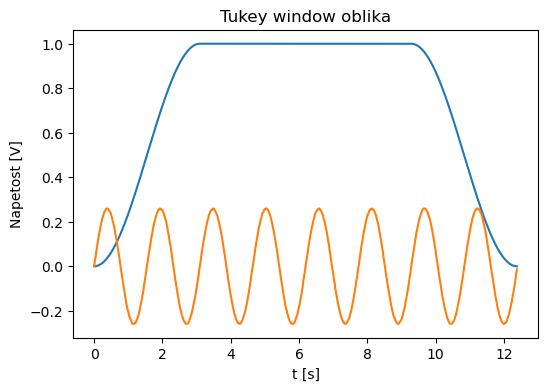

In [9]:
window = signal.windows.tukey(len(g1))
fig = plt.figure(figsize=(6,4))
# g1 += np.random.normal(0, 0.05, len(g1))
plt.gca().set_title('Tukey window oblika')
plt.plot(t_c, window)
plt.plot(t_c, g1)
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.show()

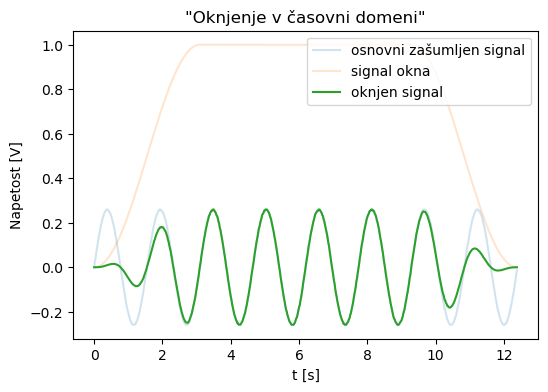

In [10]:
dt = t_c[1]
g1_okn = (g1) * window
freq_g = np.fft.rfftfreq(len(t_c), dt)
G1 = np.fft.rfft(g1, norm='forward')
G1_okn = np.fft.rfft(g1_okn, norm='forward')
# K11 = np.convolve(g1, window) / 1

fig = plt.figure(figsize=(6,4))
plt.gca().set_title('"Oknjenje v časovni domeni"')
plt.plot(t_c, g1, alpha=0.2, label='osnovni zašumljen signal')
plt.plot(t_c, window, alpha=0.2, label='signal okna')
plt.plot(t_c, g1_okn, label='oknjen signal')
plt.xlabel('t [s]')
plt.ylabel('Napetost [V]')
plt.legend(loc="upper right")
plt.show()

### Oknjenje v frekvenci

Za oknjenje v frekvenci moramo najprej narediti FFT za oba signala ločeno, potem pa narediti konvolucijo v frekvenčni domeni, da dobimo isto. KEr je dolžina signala po konvoluciji enaka vsoti dolžin obeh signalov, ki v njej sodelujeta, moramo naša signala umetno podaljšati.

In [11]:
G1 = np.fft.rfft(g1, norm='forward')            # FFT signala 1 (g1)
G1[1:] *= 2
G1_okn = np.fft.rfft(g1_okn, norm='forward')    #FFT oknjenjega signala (oknjenega v časovni domeni)
G1_okn[1:] *= 2* len(window)/sum(window)

W = np.fft.rfft(window, norm='forward')         # FFT okna
freq_ = np.fft.rfftfreq(2*len(t_c), d=dt/2)     # Definicija freq je spremenjena, za dvakrat daljši (konvuliran?) signal

conv = np.abs(np.convolve(W, G1)) * len(window)/sum(window) #sama konvolucija v freq

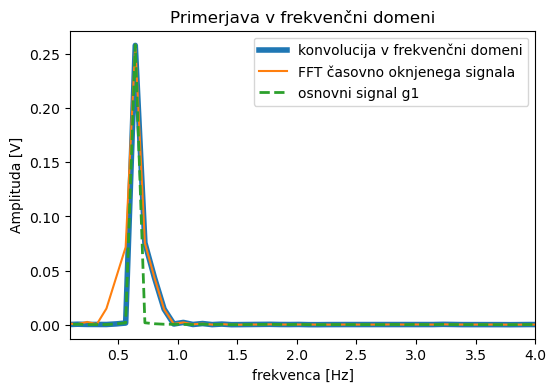

In [12]:
fig = plt.figure(figsize=(6,4))
plt.gca().set_title('Primerjava v frekvenčni domeni')
plt.plot(freq_, conv, lw=4, label='konvolucija v frekvenčni domeni')
plt.plot(freq_g, abs(G1_okn), label='FFT časovno oknjenega signala')
plt.plot(freq_g, abs(G1), '--', lw=2, label='osnovni signal g1')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Amplituda [V]')
plt.xlim(0.1, 4)
plt.legend()
plt.show()